<div style="display: 'flex'; display: flex; justify-content: center; flex-direction: column; align-items: center;">
    <h1><i><b>TUGAS BESAR II4035 (SISTEM CERDAS)</b></i></h1>
    <h1><i><b>CLIMATE CHANGE: CLIMATE CHANGE TWEETS</b></i></h1>
    <h2><b>MILESTONE 3: DATA PREPARATION AND MODELLING</b></h2>
    <br>
    <img src="https://t3.ftcdn.net/jpg/05/73/96/92/360_F_573969248_rkDRwe3jOYGENhrF8tlVw7GFHqSXxq3j.jpg" alt="Description of the image">
    <p><b>Nama : Nazhif Haidar Putra Wibowo<br>
    NIM : 18221083<br>
    Kelas : 01<br>
    Kelompok: 7</b></p>
</div>

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Install Required Library

In [ ]:
!pip install -r "./gdrive/MyDrive/Siscer/requirements.txt"

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


# Import General Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud
import tensorflow as tf

# Import and Load dataset as DataFrame

In [ ]:
tweets = pd.read_csv("./gdrive/MyDrive/Siscer/twitter_sentiment_data.csv")
tweets.head(10)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


# Data Preparation (Data Cleaning)

## Remove Duplicates

In [ ]:
tweets = tweets.drop_duplicates(subset="message")

## Drop "tweetid" columns
tweetid is just a unique identifier. therefore, need to be removed

In [ ]:
tweets.drop(columns=["tweetid"], inplace=True, axis=1)
tweets.head(5)

<ipython-input-140-40b32d6c5061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.drop(columns=["tweetid"], inplace=True, axis=1)


,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


## Reduce the scope

### Reduce the "News" Sentiment
Because the limitation of time, I decided to reduce the class by removing the "News" class

In [ ]:
tweets = tweets[tweets["sentiment"] != 2 ]

### Undersampling
Because the data is imbalance, and I want to reduce the time consumed for analysis, and modelling. I decided to undersample the dataset

In [ ]:
# Perform undersampling
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state = 42)
X = tweets.drop(columns=['sentiment'])
y = tweets['sentiment']

X_resampled, y_resampled = undersampler.fit_resample(X, y)

tweets = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['sentiment'])], axis=1)

sentiment
-1    3856
 0    3856
 1    3856
Name: count, dtype: int64

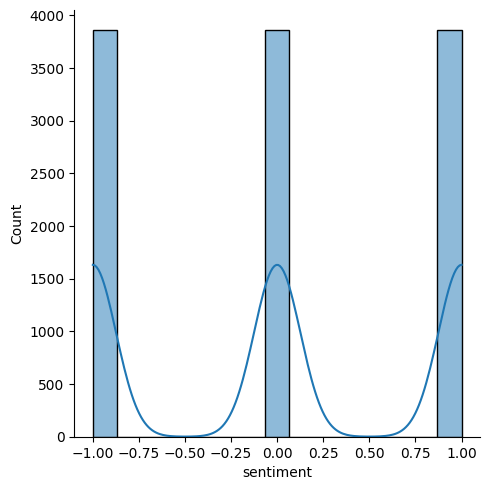

In [ ]:
display(tweets.sentiment.value_counts())

sns.displot(data=tweets, x='sentiment', kde=True)
plt.show()

## Lowercase all the words
this is done because the model treat word such as "Anti" and "anti" different

In [ ]:
tweets["message_cleaned"] = tweets["message"].apply(lambda x: x.lower())

## Remove HTTP / HTTPS Link
Link does not mean anything. we need to remove them

In [ ]:
tweets["message_cleaned"] = tweets["message_cleaned"].apply(lambda x: re.sub(r'(?:https?://\S+|www\.\S+)\b', '', x))

## Remove the English Contraction
we do this to get a better analysis of the data

Contraction dictionary

In [ ]:
contractions_dict = { "ain't": "are not","'s":" is", "it's":"it is", "aren't": "are not", "isn't": "is not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

Removing

In [ ]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

tweets["message_cleaned"] = tweets["message_cleaned"].apply(lambda x: expand_contractions(x))

## Removing Digits from the tweets
Numbers does not mean anything to the sentiment. It is better to remove them

In [ ]:
tweets["message_cleaned"] = tweets["message_cleaned"].apply(lambda x: re.sub('\w*\d\w*','', x))

## Remove all accounts (start with '@')
User Name is not important for the text analysis. thus, we need to remove them

In [ ]:
tweets['message_cleaned']=tweets['message_cleaned'].apply(lambda x: re.sub(r'@\w+\b', '', x))

In [ ]:
tweets['message_cleaned'].head(50)

0      climate change is an interesting hustle as it...
1      arseholes could not predict tomorrows weather...
2     @ you do understand that climate change is nat...
3     rt @: why do not you fucking global warming id...
4     rt : it is freezing outside, where the hell is...
5     rt : the concept of global warming was created...
6     man has no significant effect on climate! henc...
7     rt :  degrees in november ã°å¸ëœå“ã°å¸â€˜å’ã°å...
8                    hmmmm climate change is not real! 
9      sorry. i do not believe in climate change. i ...
10    rt : obviously istanbul is expecting some wick...
11    too bad this normally intelligent man believes...
12    liberals changed the term 'global warming' to ...
13    : you will die due the  bug. : ditto, climate ...
14      the russians did it - oh wait, is this when ...
15    in my opinion,climate change is nothing more t...
16    asshole leo dick-crappio made a climate change...
17     @  more aviation fuel burned impacting th

## Convert 'q' to single quote
from the dataset, i noticed that q symbol represent single quote mark. we need to change them to single quote

In [ ]:
tweets["message_cleaned"] = tweets["message_cleaned"].apply(lambda x: re.sub('q', '\'', x))
tweets["message_cleaned"].head(30)

0      climate change is an interesting hustle as it...
1      arseholes could not predict tomorrows weather...
2     @ you do understand that climate change is nat...
3     rt @: why do not you fucking global warming id...
4     rt : it is freezing outside, where the hell is...
5     rt : the concept of global warming was created...
6     man has no significant effect on climate! henc...
7     rt :  degrees in november ã°å¸ëœå“ã°å¸â€˜å’ã°å...
8                    hmmmm climate change is not real! 
9      sorry. i do not believe in climate change. i ...
10    rt : obviously istanbul is expecting some wick...
11    too bad this normally intelligent man believes...
12    liberals changed the term 'global warming' to ...
13    : you will die due the  bug. : ditto, climate ...
14      the russians did it - oh wait, is this when ...
15    in my opinion,climate change is nothing more t...
16    asshole leo dick-crappio made a climate change...
17     @  more aviation fuel burned impacting th

## Remove Punctuations
Punctutations are not important for the modelling


In [ ]:
def remove_punctuation(text):
    punctuation_pattern = r'[^\w\s]'
    text_no_punctuation = re.sub(punctuation_pattern, '', text)
    return text_no_punctuation

In [ ]:
tweets['message_cleaned']=tweets['message_cleaned'].apply(lambda x: remove_punctuation(x))  # remove punctuation
tweets['message_cleaned']=tweets['message_cleaned'].apply(lambda x: re.sub(' +',' ',x))    # remove extra whitespaces
tweets['message_cleaned'].head(50)

0      climate change is an interesting hustle as it...
1      arseholes could not predict tomorrows weather...
2      you do understand that climate change is natu...
3     rt why do not you fucking global warming idiot...
4     rt it is freezing outside where the hell is gl...
5     rt the concept of global warming was created b...
6     man has no significant effect on climate hence...
7     rt degrees in november ãåëœåãåâåãååâbut global...
8                     hmmmm climate change is not real 
9      sorry i do not believe in climate change i th...
10    rt obviously istanbul is expecting some wicked...
11    too bad this normally intelligent man believes...
12    liberals changed the term global warming to cl...
13     you will die due the bug ditto climate change...
14     the russians did it oh wait is this when we b...
15    in my opinionclimate change is nothing more th...
16    asshole leo dickcrappio made a climate change ...
17     more aviation fuel burned impacting the c

## Remove 'rt'
word 'rt' does not have any meaning that will affect the sentiments. we need to remove them

In [ ]:
def remove_rt(text):
    rt_pattern = r'\brt\s*'
    
    # remove 'rt' and optional spaces, and then replace multiple spaces with a single space
    cleaned_text = re.sub(rt_pattern, '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text

tweets['message_cleaned']=tweets['message_cleaned'].apply(lambda x: remove_rt(x))
tweets['message_cleaned'].head(10)

0     climate change is an interesting hustle as it...
1     arseholes could not predict tomorrows weather...
2     you do understand that climate change is natu...
3    why do not you fucking global warming idiots j...
4    it is freezing outside where the hell is globa...
5    the concept of global warming was created by a...
6    man has no significant effect on climate hence...
7    degrees in november ãåëœåãåâåãååâbut global wa...
8                    hmmmm climate change is not real 
9     sorry i do not believe in climate change i th...
Name: message_cleaned, dtype: object

## Remove the escape character
removing the escape character is necessary

In [ ]:
tweets["message_cleaned"] = tweets["message_cleaned"].apply(lambda x: re.sub(r'[\n\r]', '', x))
tweets['message_cleaned'][28]

' denies climate change i do not know a single person who denies changes its the manmade part we deny you idiot'

## Remove non-english alphabet word

In [ ]:
tweets["message_cleaned"] = tweets["message_cleaned"].apply(lambda x: re.sub( r'[^a-zA-Z\s]', '', x))
tweets["message_cleaned"].head(10)

0     climate change is an interesting hustle as it...
1     arseholes could not predict tomorrows weather...
2     you do understand that climate change is natu...
3    why do not you fucking global warming idiots j...
4    it is freezing outside where the hell is globa...
5    the concept of global warming was created by a...
6    man has no significant effect on climate hence...
7    degrees in november but global warming is not ...
8                    hmmmm climate change is not real 
9     sorry i do not believe in climate change i th...
Name: message_cleaned, dtype: object

### remove extra whitespaces and tweets that only contains whitespace

In [ ]:
tweets["message_cleaned"] = tweets['message_cleaned'].apply(lambda x: x.strip()).replace('', pd.NA)
tweets = tweets.dropna()
tweets["message_cleaned"].head(10)

0    climate change is an interesting hustle as it ...
1    arseholes could not predict tomorrows weather ...
2    you do understand that climate change is natur...
3    why do not you fucking global warming idiots j...
4    it is freezing outside where the hell is globa...
5    the concept of global warming was created by a...
6    man has no significant effect on climate hence...
7    degrees in november but global warming is not ...
8                     hmmmm climate change is not real
9    sorry i do not believe in climate change i thi...
Name: message_cleaned, dtype: object

then, I will save the changes. so that I don't have to rerun again and wait for a long time

## Remove Stop Words
stop word is a word that contains no information. Thus, will not have a significant influence over the sentiments

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(nltk.corpus.stopwords.words('english'))

# remove the stop words
def remove_stop_words(messages):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    cleaned_messages = []
    for message in messages:
        words = re.findall(r"(?:^|\s)(\b[\w.:\/\']+\b)(?=\W|\s|$)", message)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_message = ' '.join(cleaned_words)
        cleaned_messages.append(cleaned_message)
    return cleaned_messages

tweets["message_cleaned"] = remove_stop_words(tweets["message_cleaned"])
tweets["message_cleaned"].head(20)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     climate change interesting hustle global warmi...
1     arseholes could predict tomorrows weather mont...
2     understand climate change natural necessarily ...
3     fucking global warming idiots go away get real...
4                  freezing outside hell global warming
5     concept global warming created chinese order m...
6     man significant effect climate hence name chan...
7         degrees november global warming real liberals
8                             hmmmm climate change real
9     sorry believe climate change think big sham ge...
10    obviously istanbul expecting wicked climate ch...
11    bad normally intelligent man believes world en...
12    liberals changed term global warming climate c...
13     die due bug ditto climate change hacked uite say
14                russians oh wait blame global warming
15    opinionclimate change nothing way remove money...
16    asshole leo dickcrappio made climate change fi...
17    aviation fuel burned impacting climate cha

## Lemmatization
Lemmatization is simplification of verb back to its original word root

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
tweets["message_lemmatized"] = tweets["message_cleaned"].apply(lambda x: lemmatize_text(x))
tweets = tweets[tweets['message_lemmatized'].str.len() > 0]

# Reset the index if needed
tweets.reset_index(drop=True, inplace=True)
tweets["message_lemmatized"].head(20)

0     climate change interesting hustle global warmi...
1     arsehole could predict tomorrow weather month ...
2     understand climate change natural necessarily ...
3     fucking global warming idiot go away get real ...
4                  freezing outside hell global warming
5     concept global warming created chinese order m...
6     man significant effect climate hence name chan...
7           degree november global warming real liberal
8                             hmmmm climate change real
9     sorry believe climate change think big sham ge...
10    obviously istanbul expecting wicked climate ch...
11    bad normally intelligent man belief world endi...
12    liberal changed term global warming climate ch...
13     die due bug ditto climate change hacked uite say
14                 russian oh wait blame global warming
15    opinionclimate change nothing way remove money...
16    asshole leo dickcrappio made climate change fi...
17    aviation fuel burned impacting climate cha

In [ ]:
tweets.dropna(inplace=True)   # drop the NA value because it is small compared the others
tweets["sentiment"] = tweets["sentiment"].astype('category')

<ipython-input-163-38335d9ccbae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.dropna(inplace=True)   # drop the NA value because it is small compared the others
<ipython-input-163-38335d9ccbae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["sentiment"] = tweets["sentiment"].astype('category')


## Remove Typo words
remove those words and remove extra whitespace after the process

In [ ]:
def replace_typos(text):
    # Define a pattern to match repeated vowels with length greater than 2
    pattern = r'([aeiou])\1{2,}'  # Matches any vowel repeated 3 or more times

    # Define a function to replace the matched pattern with longer vowels
    def replace(match):
        return match.group(1)  # Replace with the same vowel repeated 6 times

    # Use re.sub() to perform the replacement
    corrected_text = re.sub(pattern, replace, text)

    return corrected_text

def remove_specific_words(text):
    # Define the words to be removed and their variations
    words_to_remove = ["qclimate", "changeq"]

    # Create a regular expression pattern to match any occurrence of the specified words
    pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'

    # Replace each occurrence of the pattern with an empty string
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    text = replace_typos(text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text


tweets['message_lemmatized'] = tweets['message_lemmatized'].apply(remove_specific_words)



## Remove non alphanumerical character

In [ ]:


def text_cleaning(text):
    text = re.sub(r'\[[^]]*\]', '', text)
    pattern = r"[^a-zA-Z0-9\s,']"
    text = re.sub(pattern, '', text)
    return text

tweets["message_lemmatized"] = tweets["message_lemmatized"].apply(lambda x: text_cleaning(x))

# Display the updated DataFrame
tweets["message_lemmatized"].head(20)

0     climate change interesting hustle global warmi...
1     arsehole could predict tomorrow weather month ...
2     understand climate change natural necessarily ...
3     fucking global warming idiot go away get real ...
4                  freezing outside hell global warming
5     concept global warming created chinese order m...
6     man significant effect climate hence name chan...
7           degree november global warming real liberal
8                             hmmmm climate change real
9     sorry believe climate change think big sham ge...
10    obviously istanbul expecting wicked climate ch...
11    bad normally intelligent man belief world endi...
12    liberal changed term global warming climate ch...
13     die due bug ditto climate change hacked uite say
14                 russian oh wait blame global warming
15    opinionclimate change nothing way remove money...
16    asshole leo dickcrappio made climate change fi...
17    aviation fuel burned impacting climate cha

## Generate Document Term Matrix
this can be useful to get the importance of words

In [ ]:

tweets_grouped=tweets[['sentiment','message_lemmatized']].groupby(by='sentiment').agg(lambda x:' '.join(x))
tweets_grouped.head()

,message_lemmatized
sentiment,
-1,climate change interesting hustle global warmi...
0,welcome misums professor mette morsing introdu...
1,climate change influencing migration aphg ape ...


In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(tweets_grouped['message_lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=tweets_grouped.index
df_dtm.head(3)

,aampm,aan,aap,aarey,aaron,ab,abandon,abandoned,abandoning,abbas,...,zo,zoe,zombie,zone,zonejersey,zoo,zum,zur,zwager,zwitserland
sentiment,,,,,,,,,,,,,,,,,,,,,
-1,0,0,0,0,1,2,0,0,0,0,...,0,0,1,3,0,0,0,0,0,0
0,0,1,1,0,1,1,1,0,1,1,...,1,2,2,3,0,1,1,1,1,1
1,1,0,0,1,0,1,3,1,1,0,...,0,1,0,4,1,0,0,0,0,0


clears the remaining trailing whitespaces

In [ ]:
tweets["message_lemmatized"] = tweets['message_lemmatized'].str.strip()

# Drop rows where the lemmatized message is empty
tweets = tweets.dropna(subset=["message_lemmatized"])
tweets["message_lemmatized"].head(10)

0    climate change interesting hustle global warmi...
1    arsehole could predict tomorrow weather month ...
2    understand climate change natural necessarily ...
3    fucking global warming idiot go away get real ...
4                 freezing outside hell global warming
5    concept global warming created chinese order m...
6    man significant effect climate hence name chan...
7          degree november global warming real liberal
8                            hmmmm climate change real
9    sorry believe climate change think big sham ge...
Name: message_lemmatized, dtype: object

# Exploratory Data Analysis (EDA)

## Sentiment Distribution

sentiment
1     3856
-1    3854
0     3844
Name: count, dtype: int64

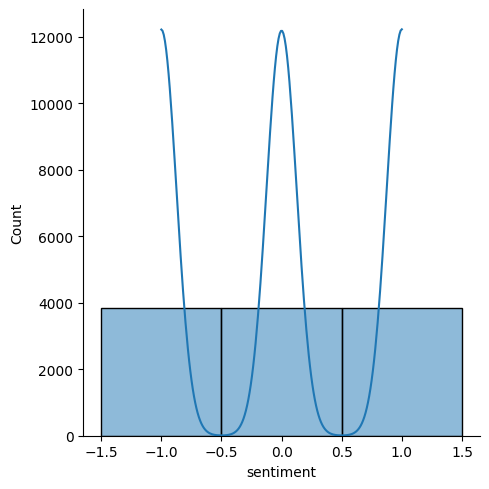

In [ ]:
display(tweets.sentiment.value_counts())

sns.displot(data=tweets, x='sentiment', kde=True)
plt.show()

Each tweet is labelled as one of the following classes:

- 2(News): the tweet links to factual news about climate change
- 1(Pro): the tweet supports the belief of man-made climate change
- 0(Neutral): the tweet neither supports nor refutes the belief of man-made climate change
- -1(Anti): the tweet does not believe in man-made climate change

## Sentiment Map

In [ ]:
sentiment_map = {-1: "Anti", 0: "Neutral", 1: "Pro", 2: "News"}

## Tweets Length Distribution

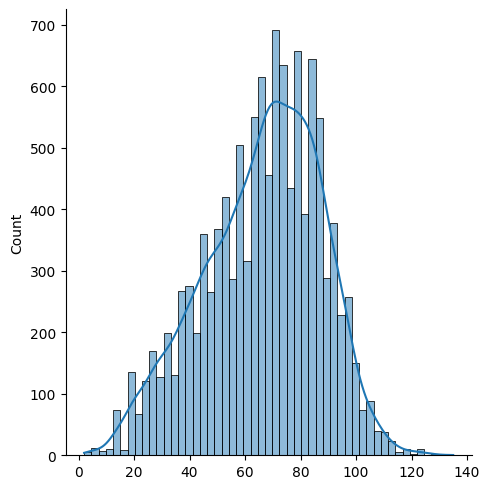

In [ ]:
tweets_lengths = [(len(message), message) for message in tweets["message_lemmatized"]]
sns.displot(data=[tweet_length[0] for tweet_length in tweets_lengths], kde=True)
plt.show()

## The Shortest and The Longest Tweet

In [ ]:
shortest_tweet = min(tweets_lengths, key=lambda x: x[0])
longest_tweet = max(tweets_lengths, key=lambda x: x[0])
print(f'Shortest message length: {shortest_tweet[0]} with message \"{shortest_tweet[1]}\"')
print(f'Longest message length: {longest_tweet[0]} with message \"{longest_tweet[1]}\"')

Shortest message length: 2 with message "oh"
Longest message length: 135 with message "la elecciones estadounidenses han sido como un tipping point la eleccin de trump como el runaway climate change impredecibilidad futura"


## Find NaN Value for each column

In [ ]:
for col in tweets.columns:
    print("Number of NaN values in %s column = %d" % (col, tweets[col].isna().sum()))

Number of NaN values in message column = 0
Number of NaN values in sentiment column = 0
Number of NaN values in message_cleaned column = 0
Number of NaN values in message_lemmatized column = 0


There is no NA data in this dataset. This means that there is no need to handle missing values in the dataset.

## Find the most mentioned word

In [ ]:
regex_pattern = r"(?:^|\s)(\b[\w.:\/\']+\b)(?=\W|\s|$)"

In [ ]:
word_dicts = {}

for message in tweets["message_lemmatized"]:
    words = re.findall(regex_pattern, message)
    for word in words:
        if word in word_dicts:
            word_dicts[word] += 1
        else:
            word_dicts[word] = 1



### Find the most mentioned from all data

In [ ]:
# find the most mentioned word
if word_dicts:
    most_mentioned_word = max(word_dicts, key=word_dicts.get)
    print("The most mentioned word is",
        most_mentioned_word, "with count =",
        word_dicts[most_mentioned_word])
else:
    print("No words found in the tweets.")

The most mentioned word is climate with count = 7999


### Find the most mentioned word by sentiments

The most mentioned word with Anti sentiment is climate with total word count = 2317
The most mentioned word with Neutral sentiment is climate with total word count = 2351
The most mentioned word with Pro sentiment is climate with total word count = 3331


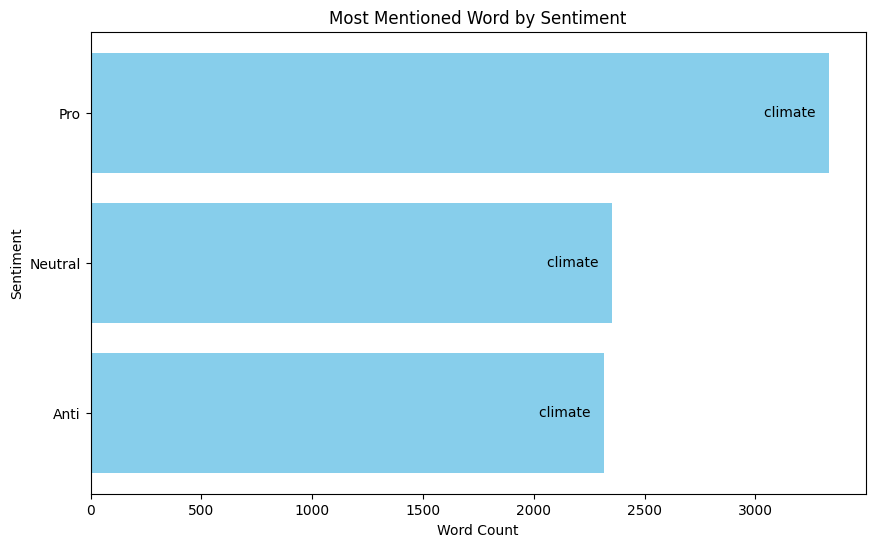

In [ ]:
def word_by_sentiment(messages):
    word_dicts = {}

    for message in messages:

        words = re.findall(regex_pattern, message)
        for word in words:
            if word in word_dicts:
                word_dicts[word] += 1
            else:
                word_dicts[word] = 1
    return word_dicts


results = []

for sentiment in tweets["sentiment"].unique():
    word_dict_sentiment = word_by_sentiment(
        tweets[tweets["sentiment"] == sentiment]["message_lemmatized"]
    )
    most_mentioned_word_in_the_sentiment = max(
        word_dict_sentiment, key=word_dict_sentiment.get
    )
    print(
        "The most mentioned word with",
        sentiment_map[sentiment],
        "sentiment is",
        most_mentioned_word_in_the_sentiment,
        "with total word count =",
        word_dict_sentiment[most_mentioned_word_in_the_sentiment],
    )
    results.append(
        {
            "Sentiment": sentiment,
            "Most Mentioned Word": most_mentioned_word_in_the_sentiment,
            "Word Count": word_dict_sentiment[most_mentioned_word_in_the_sentiment],
        }
    )

# convert results to a DataFrame
results_df = pd.DataFrame(results)

# plotting
plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(results_df["Sentiment"]):
    plt.barh(i, results_df["Word Count"][i], color="skyblue")
    plt.text(
        results_df["Word Count"][i],
        i,
        results_df["Most Mentioned Word"][i] + "   ",
        ha="right",
        va="center",
    )

plt.yticks(
    range(len(results_df)),
    [sentiment_map[sentiment] for sentiment in results_df["Sentiment"]],
)
plt.xlabel("Word Count")
plt.ylabel("Sentiment")
plt.title("Most Mentioned Word by Sentiment")
plt.show()

The "Change" word is the most frequently mentioned word. it has relation with the word "climate" to make phrase "climate change"

## Word Clouds for each sentiment

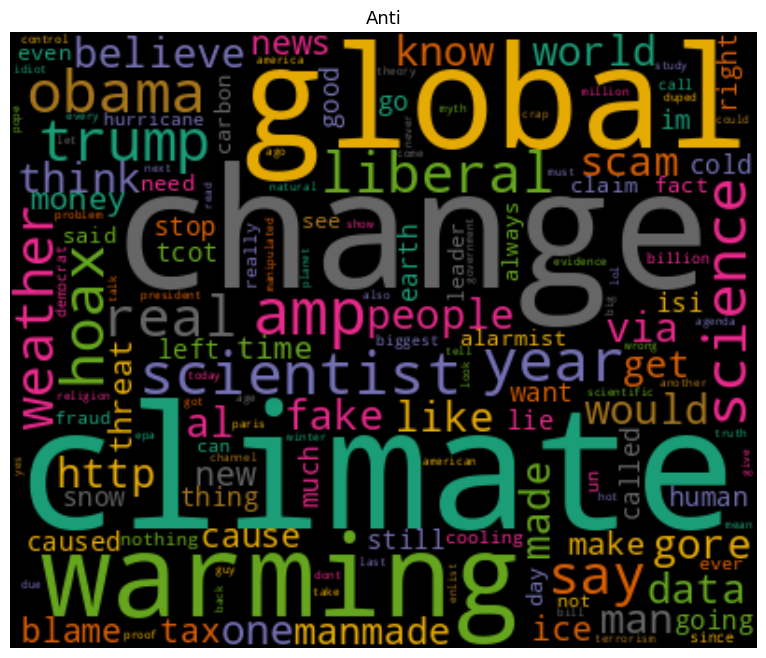

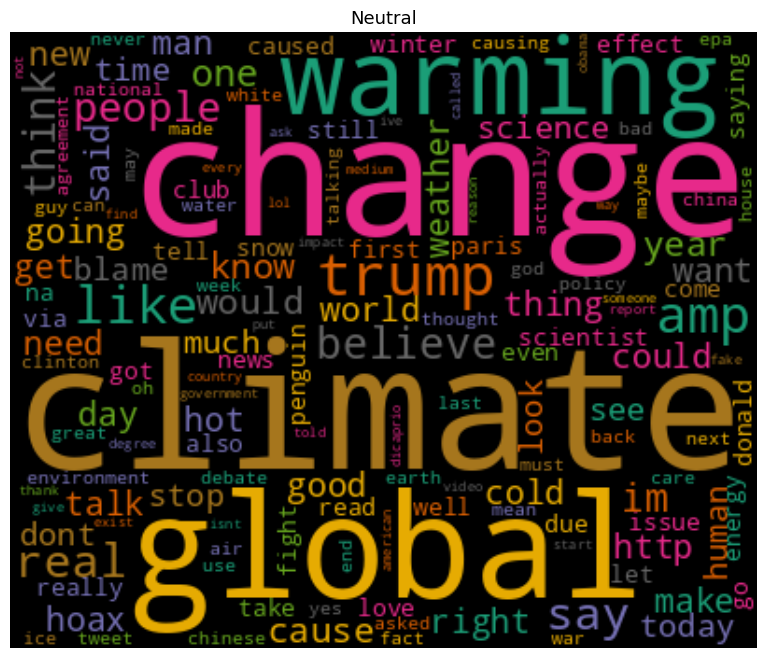

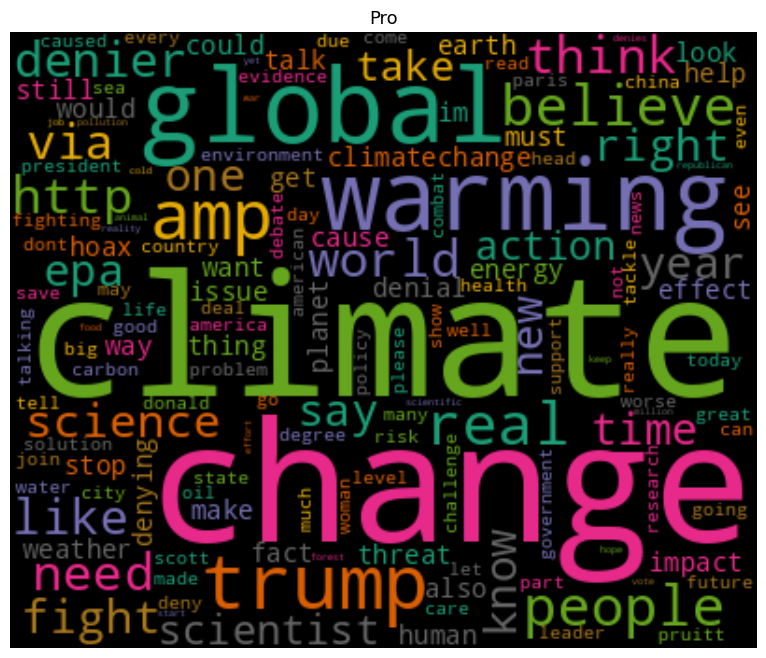

In [ ]:
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(sentiment_map[title],60)),fontsize=13)
  # plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,sentiment in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[sentiment].sort_values(ascending=False),sentiment)

Climate change are the word the most mentioned in the datasets

## Count for each stop words that exists in the tweets

We will use NLTK library to identify the stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


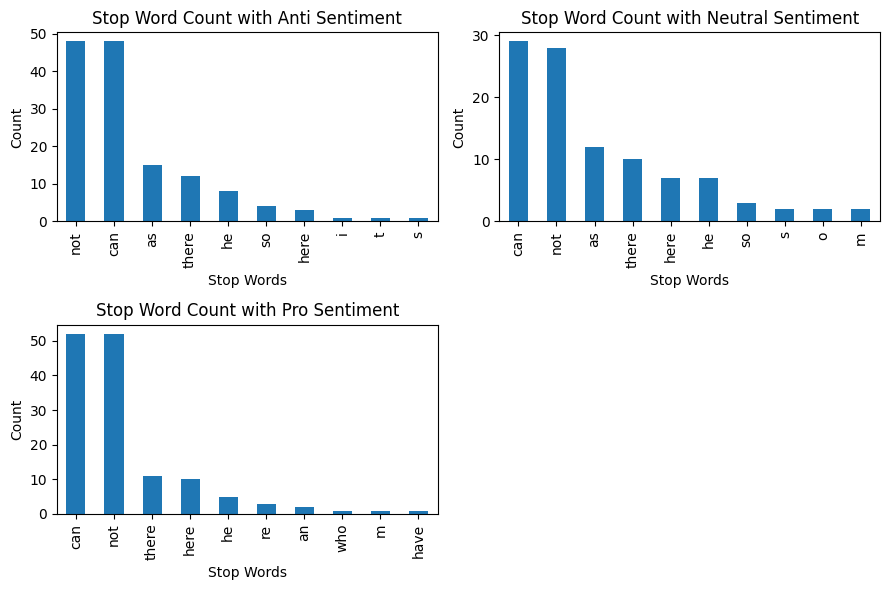

In [ ]:
nltk.download('stopwords')
# define a function to count stop words
def count_stop_words(messages):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_word_counts = {word: 0 for word in stop_words}  # Initialize counts for all stop words
    for message in messages:
        words = re.findall(regex_pattern, message)
        for word in words:
            if word.lower() in stop_words:
                stop_word_counts[word.lower()] += 1
    return stop_word_counts

results = {}
for sentiment in tweets["sentiment"].unique():
    stop_word_counts = count_stop_words(tweets[tweets["sentiment"] == sentiment]["message_lemmatized"])
    results[sentiment] = stop_word_counts

results_df = pd.DataFrame(results)

#visualize for top 10 words for each sentiment
for i, sentiment in enumerate(results_df.columns):
    plt.subplot(2, 2, i+1)
    results_df[sentiment].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(9, 6))
    plt.xlabel('Stop Words')
    plt.ylabel('Count')
    plt.title(f'Stop Word Count with {sentiment_map[sentiment]} Sentiment')

plt.tight_layout()
plt.show()

Based on the bar plot visualization above, "as" becomes the most frequently occurring stop word in tweets with anti and neutral sentiments.

## Remove Stop Words (Again)
because the previous stop words removal did not clean all of them. we need to do it again

In [ ]:
def remove_stop_words(messages):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    cleaned_messages = []
    for message in messages:
        words = re.findall(regex_pattern, message)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_message = ' '.join(cleaned_words)
        cleaned_messages.append(cleaned_message)
    return cleaned_messages

tweets["message_lemmatized"] = remove_stop_words(tweets["message_lemmatized"])

## Checking the Top five's 2-Gram (Biagram) by sentiments

Top five 2-Grams for Anti Sentiment:
climate change: 2107 occurrences
global warming: 1745 occurrences
al gore: 102 occurrences
man made: 85 occurrences
warming hoax: 69 occurrences

Top five 2-Grams for Neutral Sentiment:
climate change: 2262 occurrences
global warming: 1506 occurrences
warming real: 50 occurrences
club penguin: 41 occurrences
believe climate: 41 occurrences

Top five 2-Grams for Pro Sentiment:
climate change: 3177 occurrences
global warming: 642 occurrences
change real: 121 occurrences
change denier: 111 occurrences
fight climate: 93 occurrences



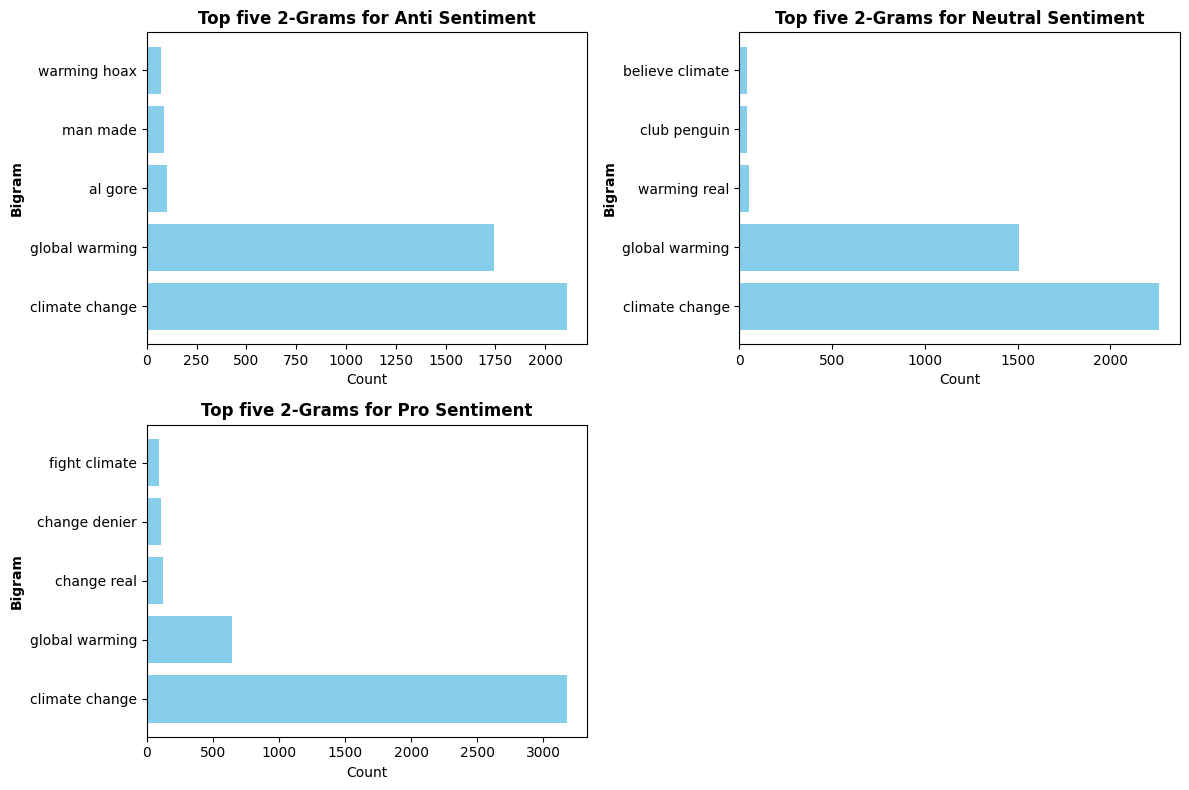

In [ ]:
from collections import Counter

def count_bigrams(messages):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    bigram_counts = Counter()
    for message in messages:
        words = re.findall(regex_pattern, message)
        words = [word.lower() for word in words if word.lower() not in stop_words]
        bigram_counts.update(nltk.bigrams(words))
    return bigram_counts

results = {} # Creating a dictionary to store the results

for sentiment in tweets["sentiment"].unique():
    bigram_counts = count_bigrams(tweets[tweets["sentiment"] == sentiment]["message_lemmatized"])
    results[sentiment] = bigram_counts

top_five_bigrams = {}
for sentiment, bigram_counts in results.items():
    top_five_bigrams[sentiment] = bigram_counts.most_common(5)

for sentiment, bigrams_list in top_five_bigrams.items():
    print(f"Top five 2-Grams for {sentiment_map[sentiment]} Sentiment:")
    for bigram, count in bigrams_list:
        print(f"{' '.join(bigram)}: {count} occurrences")
    print()

# visualization
plt.figure(figsize=(12, 8))

for i, (sentiment, bigrams_list) in enumerate(top_five_bigrams.items()):
    bigrams_labels = [' '.join(bigram) for bigram, _ in bigrams_list]
    bigrams_counts = [count for _, count in bigrams_list]

    plt.subplot(2, 2, i+1)
    plt.barh(bigrams_labels, bigrams_counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Bigram', fontweight='bold')
    plt.title(f'Top five 2-Grams for {sentiment_map[sentiment]} Sentiment', fontweight='bold')

plt.tight_layout()
plt.show()

In the analysis results of the Bigrams, pro sentiment have have donald trump as the most. this is probably because they talked about donald trump who denies climate change

## EDA Conclusion

# Modelling

## Testing for each Word Embedding methods

### Word2Vec Embedding

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Assuming 'tweets' DataFrame has been preprocessed and contains 'message_cleaned' column

# Tokenize and preprocess the text data
tokenized_tweets = tweets['message_lemmatized'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_tweets,  window=5, min_count=1, workers=4)

# Function to average word vectors for a tweet
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0
    for word in words:
        if word in vocabulary:
            nwords += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Extract features for each tweet
word2vec_features = [average_word_vectors(tweet, word2vec_model, word2vec_model.wv.index_to_key, 100) for tweet in tokenized_tweets]

# Convert to numpy array
word2vec_features = np.array(word2vec_features)
word2vec_features

array([[-4.94082460e-01,  9.84488354e-01,  1.59455663e-01, ...,
        -9.27325393e-01, -1.66802863e-02, -4.91055427e-02],
       [-3.33103962e-01,  6.61396856e-01,  1.02103817e-01, ...,
        -6.57986171e-01,  2.27098333e-03, -6.40946557e-03],
       [-3.20379719e-01,  6.39736334e-01,  9.67989218e-02, ...,
        -6.33086233e-01, -4.03763510e-03, -6.25928089e-04],
       ...,
       [-4.93391023e-01,  9.71854704e-01,  1.49227343e-01, ...,
        -9.73078885e-01, -1.66968931e-03, -7.44233374e-04],
       [-4.59518735e-01,  9.26255124e-01,  1.34933451e-01, ...,
        -8.61631000e-01,  1.10335809e-03, -5.70056530e-02],
       [-3.46089282e-01,  6.92570543e-01,  1.03003511e-01, ...,
        -6.86143072e-01, -3.35654511e-03, -3.48151740e-03]])

#### Train and predict

##### Train and Predict using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_features, tweets['sentiment'], test_size=0.2, random_state=42)

# Define and train Logistic Regression model
lr_model = RandomForestClassifier(random_state=42)
lr_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

Predict

In [ ]:
# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.46733016010385114


Random Forest have low accuracy. we need to change the model

##### Train using Bidirectional LSTM

In [ ]:
length_of_the_messages = tweets["message_lemmatized"].str.split("\\s+")
max_number_of_words = tweets['message_lemmatized'].str.len().max()
# print(length_of_the_messages)
print("Max number of words = ", max_number_of_words)
print("Index = ", length_of_the_messages.str.len().idxmax())

Max number of words =  135
Index =  5103


In [ ]:
t = ''
for i in tweets['message_lemmatized']:
    t=t+' '+i
t=t.split()
print('total unique words in tweet: ',len(set(t)))

total unique words in tweet:  14921


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

top_words = 10000

# Fit tokenizer on the training set, reserve for unknown
tokenizer = Tokenizer(num_words=top_words, oov_token='')
word_index = tokenizer.word_index

# Create a vocabulary of words and corresponding index
tokenizer.fit_on_texts(tweets['message_lemmatized'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(tweets['message_lemmatized'].values)

max_sequence_length = max_number_of_words  # or specify your desired max length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Check the shape of padded sequences
print("Shape of padded sequences:", padded_sequences.shape)


Shape of padded sequences: (11554, 135)


###### LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# One-hot encode the sentiments
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(tweets["sentiment"].values)

# Split the data into features (padded sequences) and one-hot encoded labels
X = padded_sequences
y = encoded_labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9243, 135)
Shape of y_train: (9243,)
Shape of X_test: (2311, 135)
Shape of y_test: (2311,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

# fix random seed for reproducibility
np.random.seed(18)

# create the model
embedding_vector_length = 100

# use sequential model
model_s = Sequential()

# add embedding layer
model_s.add(Embedding(top_words, embedding_vector_length, input_length=max_number_of_words))

# add LSTM neurons
model_s.add(Bidirectional(LSTM(100)))

# add Dropout Layer
model_s.add(Dropout(0.5))

# add dense layer
model_s.add(Dense(64, activation='relu'))
model_s.add(Dense(3, activation='softmax'))

# compile
model_s.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_s.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 135, 100)          1000000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                12864     
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1173859 (4.48 MB)
Trainable params: 1173859 (4.48 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
history = model_s.fit(X_train, y_train, epochs=5, batch_size=32, verbose = 1, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# predict and evaluate the model
loss, accuracy = model_s.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/5
260/260 [==============================] - 67s 251ms/step - loss: 0.9037 - accuracy: 0.5380 - val_loss: 0.7644 - val_accuracy: 0.6346
Epoch 2/5
260/260 [==============================] - 69s 266ms/step - loss: 0.5676 - accuracy: 0.7618 - val_loss: 0.7876 - val_accuracy: 0.6519
Epoch 3/5
260/260 [==============================] - 65s 251ms/step - loss: 0.3509 - accuracy: 0.8631 - val_loss: 0.9580 - val_accuracy: 0.6551
Epoch 4/5
73/73 [==============================] - 4s 57ms/step - loss: 1.1817 - accuracy: 0.6383
Test Loss: 1.1817163228988647
Test Accuracy: 0.6382518410682678


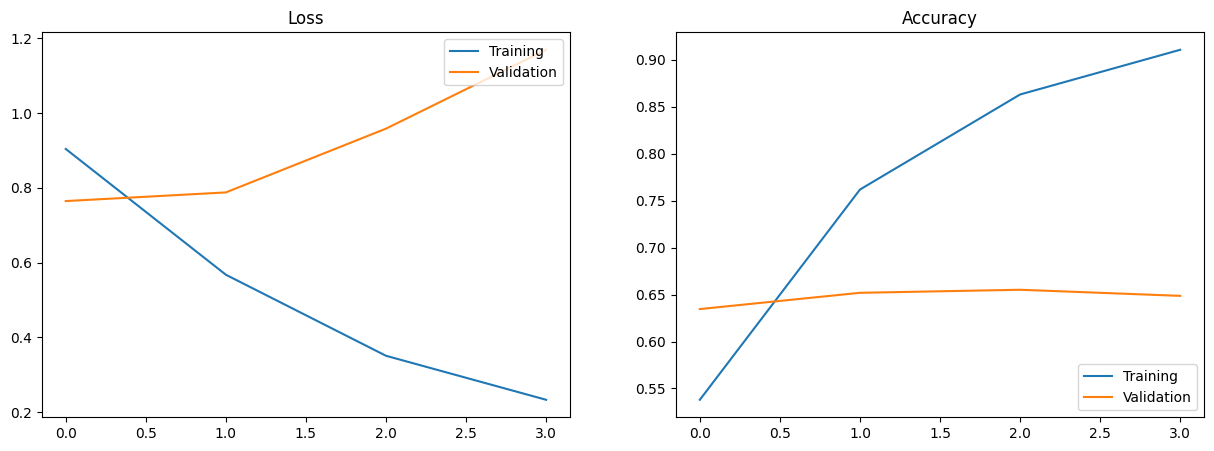

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

###### One Hot Encoding

In [ ]:


# Split the data into features and one-hot encoded labels
X = padded_sequences
y = pd.get_dummies(tweets["sentiment"].values)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9243, 135)
Shape of y_train: (9243, 3)
Shape of X_test: (2311, 135)
Shape of y_test: (2311, 3)


In [ ]:
display(y)

,-1,0,1
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
11549,False,False,True
11550,False,False,True
11551,False,False,True
11552,False,False,True


In [ ]:
# fix random seed for reproducibility
np.random.seed(18)

# create the model
embedding_vector_length = 100

# use sequential model
model_s = Sequential()

# add embedding layer
model_s.add(Embedding(top_words, embedding_vector_length, input_length=max_number_of_words))

# add Dropout Layer
model_s.add(SpatialDropout1D(0.5, input_shape=(max_number_of_words, embedding_vector_length)))

# add LSTM neurons
model_s.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5)))


# add dense layer
model_s.add(Dense(64, activation='relu'))
model_s.add(Dense(3, activation='softmax'))

# compile
model_s.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_s.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 135, 100)          1000000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 135, 100)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_3 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                12864     
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1173859 (4.48 MB)
Trainable params: 1173

In [ ]:
history = model_s.fit(X_train, y_train, epochs=5, batch_size=32, verbose = 1, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
260/260 [==============================] - 198s 694ms/step - loss: 0.9515 - accuracy: 0.5176 - val_loss: 0.8292 - val_accuracy: 0.5611
Epoch 2/5
260/260 [==============================] - 176s 678ms/step - loss: 0.7388 - accuracy: 0.6624 - val_loss: 0.7618 - val_accuracy: 0.6486
Epoch 3/5
260/260 [==============================] - 181s 696ms/step - loss: 0.5947 - accuracy: 0.7484 - val_loss: 0.7444 - val_accuracy: 0.6508
Epoch 4/5
260/260 [==============================] - 180s 694ms/step - loss: 0.4889 - accuracy: 0.8025 - val_loss: 0.7818 - val_accuracy: 0.6541
Epoch 5/5
260/260 [==============================] - 175s 673ms/step - loss: 0.4183 - accuracy: 0.8319 - val_loss: 0.8343 - val_accuracy: 0.6465


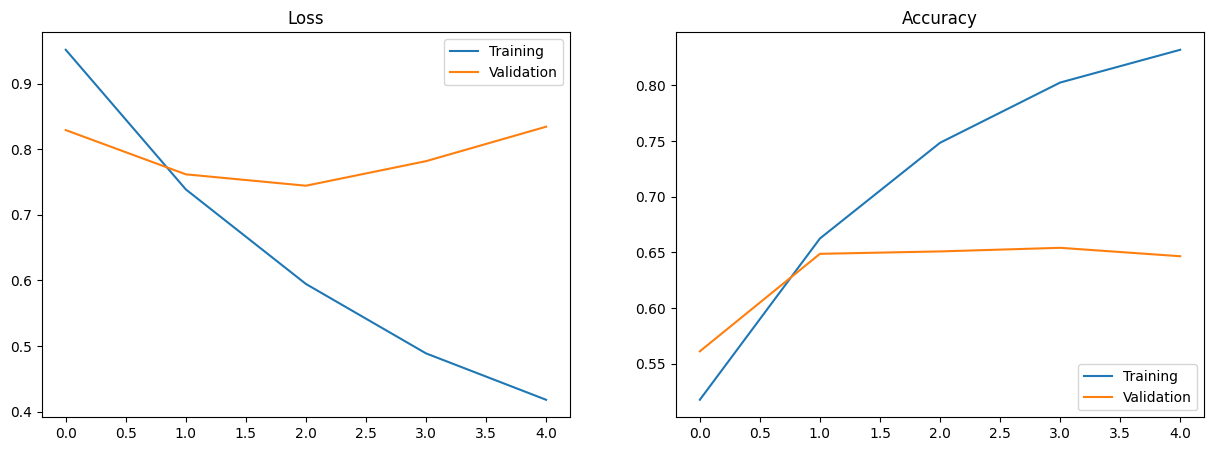

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

In [ ]:
loss, accuracy = model_s.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

73/73 [==============================] - 7s 95ms/step - loss: 0.7985 - accuracy: 0.6698
Test Loss: 0.7985248565673828
Test Accuracy: 0.6698399186134338


Baik menggunakan Label Encoding dan One Hot encoding. menghasil akurasi yang cukup sama. Namun, One Hot Encoding menghasilkan akurasi yang lebih tinggi.

##### Train and Predict using Transformers

### TF-IDF Encoding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

#### Feature Engineering

In [ ]:
vectorizer = TfidfVectorizer(max_features=top_words, ngram_range=(1,2))
X = tweets["message_lemmatized"]

label_encoder = LabelEncoder()

# Encode the 'sentiment' column
y = label_encoder.fit_transform(tweets['sentiment'])
vectorizer.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9243,)
Shape of y_train: (9243,)
Shape of X_test: (2311,)
Shape of y_test: (2311,)


#### Build model using XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from datetime import datetime

xgb_classifier = XGBClassifier()

model_tfidf = Pipeline([
    ('tfidf', vectorizer),
    ('classifier', xgb_classifier)
])

start_time = datetime.now()
model_tfidf.fit(X_train, y_train)
end_time = datetime.now()

training_time_tfidf = (end_time - start_time).total_seconds()



In [ ]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

print('Training time: {:.1f}s'.format(training_time_tfidf))

Accuracy Training data: 78.9%
Accuracy Test data: 62.6%
Training time: 17.1s


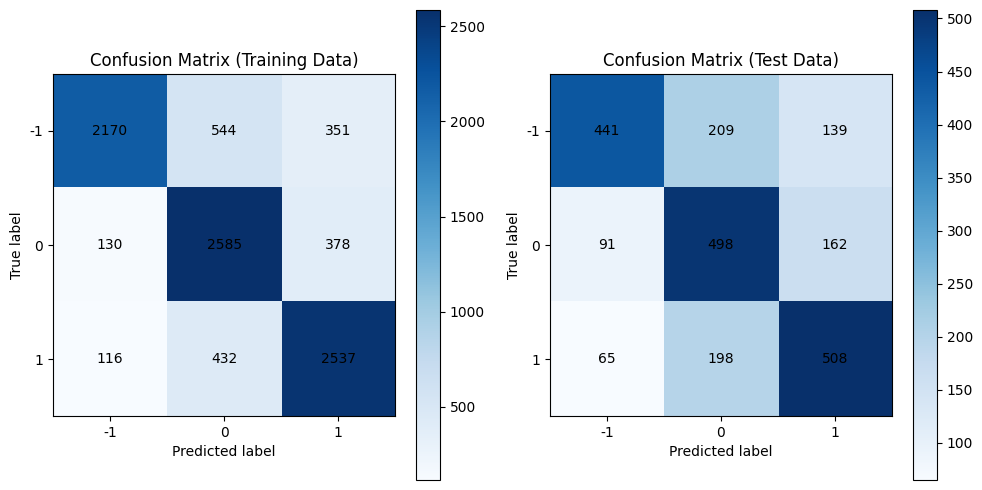

In [ ]:
from sklearn.metrics import confusion_matrix

predicted_train_labels = label_encoder.inverse_transform(predicted_train_tfidf)
predicted_test_labels = label_encoder.inverse_transform(predicted_test_tfidf)

conf_matrix_train = confusion_matrix(y_train, predicted_train_labels)
conf_matrix_test = confusion_matrix(y_test, predicted_test_labels)

unique_labels = np.unique(np.concatenate((predicted_train_labels, predicted_test_labels)))

non_zero_rows = np.sum(conf_matrix_train, axis=1) != 0
non_zero_cols = np.sum(conf_matrix_train, axis=0) != 0

# Create DataFrames for the confusion matrices
conf_matrix_train_df = pd.DataFrame(conf_matrix_train[non_zero_rows][:, non_zero_cols], index=unique_labels, columns=unique_labels)
conf_matrix_test_df = pd.DataFrame(conf_matrix_test[non_zero_rows][:, non_zero_cols], index=unique_labels, columns=unique_labels)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix (Training Data)')
plt.imshow(conf_matrix_train_df, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)
plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)
for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j, i, conf_matrix_train_df.iloc[i, j], ha='center', va='center', color='black')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(1, 2, 2)
plt.title('Confusion Matrix (Test Data)')
plt.imshow(conf_matrix_test_df, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)
plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)
for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j, i, conf_matrix_test_df.iloc[i, j], ha='center', va='center', color='black')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

From evaluation result, the pipeline has 62% accuracy.

from the confusion matrix above, 0 label is the most miscalculated by the model

## Using BERT Transformer Model

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification


split data for train and test

In [ ]:
from sklearn.preprocessing import LabelEncoder
tweets_messages = tweets["message_lemmatized"]
label_encoder = LabelEncoder()
sentiments = label_encoder.fit_transform(tweets["sentiment"])

# split using train_test_split
train_tweets,  test_tweets, train_sentiments, test_sentiments = train_test_split(tweets_messages, sentiments, test_size=0.2, random_state=42)
print(train_tweets.shape)
print(test_tweets.shape)
print(train_sentiments.shape)
print(test_sentiments.shape)

(9243,)
(2311,)
(9243,)
(2311,)


split again for validation data

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(train_tweets, train_sentiments, test_size=0.1)

### Tokenize

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', num_labels=3)

In [ ]:
max_len = max_number_of_words

# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(X_train.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(x_val.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(test_tweets.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

check the encoded result

In [ ]:
k = 2
print('Training Comments -->>',X_train[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',y_train[k])

Training Comments -->> understand climate change natural necessarily caused human snowed miami atlantic froze

Input Ids -->>
 tf.Tensor(
[  101 10047 10199  2102  8130  8398  3333  3608  4785  2689   102     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0], shape=(44,), dtype=int32)

Decoded Ids -->>
 [CLS] immelt picking trump dropped ball climate change [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

Attention Mask -->>
 tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0], shape=(44,), dtype=int32)

Labels -->> 1


### Build The Model

In [ ]:
# Initialize the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy

loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
model.compile(optimizer='adam', loss=loss, metrics=[metric])
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
    y_train,
    validation_data=(
      [X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
    batch_size=32,
    epochs=3
)

# Plot the history
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

Epoch 1/3
260/260 [==============================] - 4865s 18s/step - loss: 1.1434 - accuracy: 0.3383 - val_loss: 1.0984 - val_accuracy: 0.3340
Epoch 2/3
260/260 [==============================] - 4580s 18s/step - loss: 1.1250 - accuracy: 0.3354 - val_loss: 1.1014 - val_accuracy: 0.3342
Epoch 3/3
 84/260 [========>.....................] - ETA: 49:51 - loss: 1.1104 - accuracy: 0.3333

due to time consumed to fine tune the BERT Model. i decided to skip this model and use the One Hot Encoding Bidirectional LSTM

### Save the Trained Model

In [ ]:

path = '/gdrive/MyDrive/Siscer'
# Save tokenizer
tokenizer.save_pretrained(path +'/Tokenizer')

# Save model
model.save_pretrained(path +'/Model')

## Model Selection
Based on the model selection that I have done prior, The best general model is LSTM with one hot encoding. From this model, I will do a hyperparameter tuning to get the best hyperparameter for the model

## Hyperparameter Tuning (Bidirectional LSTM One Hot Encoding)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

length_of_the_messages = tweets["message_lemmatized"].str.split("\\s+")
max_number_of_words = tweets['message_lemmatized'].str.len().max()
# print(length_of_the_messages)
print("Max number of words = ", max_number_of_words)
print("Index = ", length_of_the_messages.str.len().idxmax())

t = ''
for i in tweets['message_lemmatized']:
    t=t+' '+i
t=t.split()
print('total unique words in tweet: ',len(set(t)))

top_words = 10000

# Fit tokenizer on the training set, reserve for unknown
tokenizer = Tokenizer(num_words=top_words, oov_token='')
word_index = tokenizer.word_index

# Create a vocabulary of words and corresponding index
tokenizer.fit_on_texts(tweets['message_lemmatized'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(tweets['message_lemmatized'].values)

max_sequence_length = max_number_of_words
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Check the shape of padded sequences
print("Shape of padded sequences:", padded_sequences.shape)



Max number of words =  135
Index =  5103
total unique words in tweet:  14921
Shape of padded sequences: (11554, 135)


In [ ]:
X = padded_sequences
y = pd.get_dummies(tweets["sentiment"].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9243, 135)
Shape of y_train: (9243, 3)
Shape of X_test: (2311, 135)
Shape of y_test: (2311, 3)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

class CustomKerasClassifier(KerasClassifier):
    def __init__(self,  dropout_rate=0.5, learning_rate=0.001, dense_units=64, lstm_units=100, **kwargs):
        self.dropout_rate = dropout_rate
        self.dense_units = dense_units
        self.learning_rate = learning_rate
        self.lstm_units = lstm_units
        super().__init__(**kwargs)

    def build_fn(self, **kwargs):
        return super().build_fn(recurrent_dropout_rate=self.recurrent_dropout_rate,
                                dropout_rate=self.dropout_rate,
                                learning_rate=self.learning_rate,
                                dense_units=self.dense_units,
                                lstm_units = self.lstm_units,
                                **kwargs)

def create_model(learning_rate=0.001, embedding_vector_length=100, lstm_units=100, dropout_rate=0.5, recurrent_dropout_rate=0.5, dense_units=64):
    optimizer = Adam(learning_rate=learning_rate)
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=max_number_of_words))
    model.add(SpatialDropout1D(dropout_rate, input_shape=(max_number_of_words, embedding_vector_length)))
    model.add(Bidirectional(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate)))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = CustomKerasClassifier(build_fn=create_model, epochs=10, verbose=1, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

print(model.get_params().keys())

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size':[32,64]

}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2)
random_search.fit(X_train, y_train)

# Print the best parameters and best accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

dict_keys(['dropout_rate', 'dense_units', 'learning_rate', 'lstm_units', 'model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 156s 826ms/step - loss: 1.0077 - accuracy: 0.4765 - val_loss: 0.8626 - val_accuracy: 0.5656
Epoch 2/10
174/174 [==============================] - 122s 702ms/step - loss: 0.7750 - accuracy: 0.6344 - val_loss: 0.7743 - val_accuracy: 0.6288
Epoch 3/10
174/174 [==============================] - 132s 754ms/step - loss: 0.6136 - accuracy: 0.7344 - val_loss: 0.7457 - val_accuracy: 0.6742
Epoch 4/10
174/174 [==============================] - 121s 691ms/step - loss: 0.4977 - accuracy: 0.7921 - val_loss: 0.7655 - val_accuracy: 0.6564
Epoch 5/10
174/174 [==============================] - 119s 687ms/step - loss: 0.4052 - accuracy: 0.8381 - val_loss: 0.8850 - val_accuracy: 0.6434
Epoch 6/10
97/97 [==============================] - 38s 111ms/step
[CV] END .................batch_size=32, learning_rate=0.001; total time=14.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 126s 678ms/step - loss: 0.9917 - accuracy: 0.4803 - val_loss: 0.8093 - val_accuracy: 0.6143
Epoch 2/10
174/174 [==============================] - 119s 685ms/step - loss: 0.7675 - accuracy: 0.6388 - val_loss: 0.7516 - val_accuracy: 0.6256
Epoch 3/10
174/174 [==============================] - 118s 679ms/step - loss: 0.6043 - accuracy: 0.7376 - val_loss: 0.7531 - val_accuracy: 0.6726
Epoch 4/10
174/174 [==============================] - 118s 679ms/step - loss: 0.4870 - accuracy: 0.8016 - val_loss: 0.7629 - val_accuracy: 0.6726
Epoch 5/10
97/97 [==============================] - 11s 104ms/step
[CV] END .................batch_size=32, learning_rate=0.001; total time=10.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 128s 684ms/step - loss: 1.0001 - accuracy: 0.4678 - val_loss: 0.8591 - val_accuracy: 0.5802
Epoch 2/10
174/174 [==============================] - 117s 670ms/step - loss: 0.7720 - accuracy: 0.6373 - val_loss: 0.8140 - val_accuracy: 0.6143
Epoch 3/10
174/174 [==============================] - 118s 680ms/step - loss: 0.6099 - accuracy: 0.7369 - val_loss: 0.7463 - val_accuracy: 0.6483
Epoch 4/10
174/174 [==============================] - 120s 688ms/step - loss: 0.4896 - accuracy: 0.7913 - val_loss: 0.7555 - val_accuracy: 0.6564
Epoch 5/10
174/174 [==============================] - 118s 678ms/step - loss: 0.3982 - accuracy: 0.8409 - val_loss: 0.8330 - val_accuracy: 0.6434
Epoch 6/10
97/97 [==============================] - 9s 90ms/step
[CV] END .................batch_size=32, learning_rate=0.001; total time=12.2min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 128s 696ms/step - loss: 0.9888 - accuracy: 0.4694 - val_loss: 0.8256 - val_accuracy: 0.5932
Epoch 2/10
174/174 [==============================] - 125s 715ms/step - loss: 0.7596 - accuracy: 0.6480 - val_loss: 0.7601 - val_accuracy: 0.6451
Epoch 3/10
174/174 [==============================] - 122s 701ms/step - loss: 0.6341 - accuracy: 0.7194 - val_loss: 0.7651 - val_accuracy: 0.6353
Epoch 4/10
174/174 [==============================] - 120s 690ms/step - loss: 0.5060 - accuracy: 0.7915 - val_loss: 0.8190 - val_accuracy: 0.6191
Epoch 5/10
97/97 [==============================] - 9s 89ms/step
[CV] END ..................batch_size=32, learning_rate=0.01; total time=10.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 128s 685ms/step - loss: 0.9918 - accuracy: 0.4808 - val_loss: 0.8084 - val_accuracy: 0.6029
Epoch 2/10
174/174 [==============================] - 120s 687ms/step - loss: 0.7618 - accuracy: 0.6418 - val_loss: 0.7403 - val_accuracy: 0.6353
Epoch 3/10
174/174 [==============================] - 117s 674ms/step - loss: 0.6153 - accuracy: 0.7317 - val_loss: 0.7366 - val_accuracy: 0.6661
Epoch 4/10
174/174 [==============================] - 117s 670ms/step - loss: 0.4846 - accuracy: 0.8014 - val_loss: 0.7680 - val_accuracy: 0.6499
Epoch 5/10
174/174 [==============================] - 118s 678ms/step - loss: 0.3955 - accuracy: 0.8436 - val_loss: 0.8501 - val_accuracy: 0.6483
Epoch 6/10
97/97 [==============================] - 10s 96ms/step
[CV] END ..................batch_size=32, learning_rate=0.01; total time=12.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 124s 672ms/step - loss: 0.9945 - accuracy: 0.4671 - val_loss: 0.8664 - val_accuracy: 0.5737
Epoch 2/10
174/174 [==============================] - 119s 683ms/step - loss: 0.7780 - accuracy: 0.6218 - val_loss: 0.7947 - val_accuracy: 0.6240
Epoch 3/10
174/174 [==============================] - 119s 683ms/step - loss: 0.6374 - accuracy: 0.7169 - val_loss: 0.7741 - val_accuracy: 0.6353
Epoch 4/10
174/174 [==============================] - 120s 687ms/step - loss: 0.5053 - accuracy: 0.7867 - val_loss: 0.7939 - val_accuracy: 0.6402
Epoch 5/10
174/174 [==============================] - 119s 685ms/step - loss: 0.4225 - accuracy: 0.8308 - val_loss: 0.8372 - val_accuracy: 0.6386
Epoch 6/10
97/97 [==============================] - 8s 83ms/step
[CV] END ..................batch_size=32, learning_rate=0.01; total time=12.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 125s 671ms/step - loss: 0.9947 - accuracy: 0.4768 - val_loss: 0.8346 - val_accuracy: 0.6062
Epoch 2/10
174/174 [==============================] - 116s 668ms/step - loss: 0.7777 - accuracy: 0.6314 - val_loss: 0.7545 - val_accuracy: 0.6402
Epoch 3/10
174/174 [==============================] - 115s 660ms/step - loss: 0.6248 - accuracy: 0.7230 - val_loss: 0.7690 - val_accuracy: 0.6451
Epoch 4/10
174/174 [==============================] - 116s 667ms/step - loss: 0.4958 - accuracy: 0.7950 - val_loss: 0.7620 - val_accuracy: 0.6629
Epoch 5/10
97/97 [==============================] - 10s 94ms/step
[CV] END ...................batch_size=32, learning_rate=0.1; total time=10.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 125s 679ms/step - loss: 1.0053 - accuracy: 0.4647 - val_loss: 0.8468 - val_accuracy: 0.5624
Epoch 2/10
174/174 [==============================] - 119s 685ms/step - loss: 0.7855 - accuracy: 0.6247 - val_loss: 0.7695 - val_accuracy: 0.6288
Epoch 3/10
174/174 [==============================] - 121s 697ms/step - loss: 0.6167 - accuracy: 0.7279 - val_loss: 0.7360 - val_accuracy: 0.6580
Epoch 4/10
174/174 [==============================] - 117s 672ms/step - loss: 0.4950 - accuracy: 0.7951 - val_loss: 0.7811 - val_accuracy: 0.6596
Epoch 5/10
174/174 [==============================] - 118s 679ms/step - loss: 0.4044 - accuracy: 0.8343 - val_loss: 0.8102 - val_accuracy: 0.6580
Epoch 6/10
97/97 [==============================] - 11s 103ms/step
[CV] END ...................batch_size=32, learning_rate=0.1; total time=12.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
174/174 [==============================] - 130s 686ms/step - loss: 0.9806 - accuracy: 0.4696 - val_loss: 0.8706 - val_accuracy: 0.5705
Epoch 2/10
174/174 [==============================] - 120s 686ms/step - loss: 0.7754 - accuracy: 0.6357 - val_loss: 0.7659 - val_accuracy: 0.6532
Epoch 3/10
174/174 [==============================] - 122s 701ms/step - loss: 0.6042 - accuracy: 0.7396 - val_loss: 0.7586 - val_accuracy: 0.6596
Epoch 4/10
174/174 [==============================] - 124s 713ms/step - loss: 0.4912 - accuracy: 0.7933 - val_loss: 0.7721 - val_accuracy: 0.6710
Epoch 5/10
174/174 [==============================] - 118s 680ms/step - loss: 0.4143 - accuracy: 0.8334 - val_loss: 0.8134 - val_accuracy: 0.6661
Epoch 6/10
97/97 [==============================] - 9s 84ms/step
[CV] END ...................batch_size=32, learning_rate=0.1; total time=12.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 85s 884ms/step - loss: 1.0343 - accuracy: 0.4458 - val_loss: 0.8691 - val_accuracy: 0.5527
Epoch 2/10
87/87 [==============================] - 78s 892ms/step - loss: 0.7989 - accuracy: 0.6164 - val_loss: 0.7465 - val_accuracy: 0.6580
Epoch 3/10
87/87 [==============================] - 78s 895ms/step - loss: 0.6471 - accuracy: 0.7167 - val_loss: 0.7220 - val_accuracy: 0.6775
Epoch 4/10
87/87 [==============================] - 78s 899ms/step - loss: 0.5236 - accuracy: 0.7787 - val_loss: 0.7430 - val_accuracy: 0.6742
Epoch 5/10
87/87 [==============================] - 78s 898ms/step - loss: 0.4360 - accuracy: 0.8216 - val_loss: 0.7807 - val_accuracy: 0.6661
Epoch 6/10
49/49 [==============================] - 6s 116ms/step
[CV] END .................batch_size=64, learning_rate=0.001; total time= 8.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 85s 895ms/step - loss: 1.0207 - accuracy: 0.4624 - val_loss: 0.8566 - val_accuracy: 0.5786
Epoch 2/10
87/87 [==============================] - 76s 872ms/step - loss: 0.7987 - accuracy: 0.6251 - val_loss: 0.7501 - val_accuracy: 0.6288
Epoch 3/10
87/87 [==============================] - 76s 877ms/step - loss: 0.6696 - accuracy: 0.6983 - val_loss: 0.7383 - val_accuracy: 0.6353
Epoch 4/10
87/87 [==============================] - 75s 864ms/step - loss: 0.5282 - accuracy: 0.7811 - val_loss: 0.7360 - val_accuracy: 0.6645
Epoch 5/10
87/87 [==============================] - 76s 876ms/step - loss: 0.4456 - accuracy: 0.8231 - val_loss: 0.7709 - val_accuracy: 0.6613
Epoch 6/10
87/87 [==============================] - 77s 882ms/step - loss: 0.3736 - accuracy: 0.8514 - val_loss: 0.8182 - val_accuracy: 0.6629
Epoch 7/10
49/49 [==============================] - 7s 129ms/step
[CV] END .................batch_size=64, learning_rate=0.001; total time= 9.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 81s 857ms/step - loss: 1.0285 - accuracy: 0.4557 - val_loss: 0.8906 - val_accuracy: 0.5640
Epoch 2/10
87/87 [==============================] - 76s 868ms/step - loss: 0.7993 - accuracy: 0.6195 - val_loss: 0.7758 - val_accuracy: 0.6207
Epoch 3/10
87/87 [==============================] - 74s 851ms/step - loss: 0.6457 - accuracy: 0.7142 - val_loss: 0.7369 - val_accuracy: 0.6548
Epoch 4/10
87/87 [==============================] - 75s 858ms/step - loss: 0.5217 - accuracy: 0.7856 - val_loss: 0.7428 - val_accuracy: 0.6532
Epoch 5/10
87/87 [==============================] - 74s 847ms/step - loss: 0.4398 - accuracy: 0.8220 - val_loss: 0.8158 - val_accuracy: 0.6370
Epoch 6/10
49/49 [==============================] - 6s 118ms/step
[CV] END .................batch_size=64, learning_rate=0.001; total time= 7.8min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 87s 880ms/step - loss: 1.0380 - accuracy: 0.4480 - val_loss: 0.8891 - val_accuracy: 0.5511
Epoch 2/10
87/87 [==============================] - 75s 861ms/step - loss: 0.8062 - accuracy: 0.6179 - val_loss: 0.7561 - val_accuracy: 0.6402
Epoch 3/10
87/87 [==============================] - 75s 862ms/step - loss: 0.6539 - accuracy: 0.7136 - val_loss: 0.7267 - val_accuracy: 0.6694
Epoch 4/10
87/87 [==============================] - 83s 951ms/step - loss: 0.5228 - accuracy: 0.7850 - val_loss: 0.7891 - val_accuracy: 0.6726
Epoch 5/10
87/87 [==============================] - 77s 881ms/step - loss: 0.4188 - accuracy: 0.8305 - val_loss: 0.8382 - val_accuracy: 0.6353
Epoch 6/10
49/49 [==============================] - 6s 114ms/step
[CV] END ..................batch_size=64, learning_rate=0.01; total time= 8.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 88s 928ms/step - loss: 1.0227 - accuracy: 0.4534 - val_loss: 0.8333 - val_accuracy: 0.5770
Epoch 2/10
87/87 [==============================] - 78s 891ms/step - loss: 0.7924 - accuracy: 0.6209 - val_loss: 0.7584 - val_accuracy: 0.6288
Epoch 3/10
87/87 [==============================] - 75s 867ms/step - loss: 0.6761 - accuracy: 0.6929 - val_loss: 0.7403 - val_accuracy: 0.6580
Epoch 4/10
87/87 [==============================] - 76s 873ms/step - loss: 0.5402 - accuracy: 0.7746 - val_loss: 0.7326 - val_accuracy: 0.6645
Epoch 5/10
87/87 [==============================] - 76s 871ms/step - loss: 0.4530 - accuracy: 0.8151 - val_loss: 0.7885 - val_accuracy: 0.6499
Epoch 6/10
87/87 [==============================] - 78s 886ms/step - loss: 0.3621 - accuracy: 0.8656 - val_loss: 0.8156 - val_accuracy: 0.6499
Epoch 7/10
49/49 [==============================] - 7s 138ms/step
[CV] END ..................batch_size=64, learning_rate=0.01; total time= 9.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 83s 876ms/step - loss: 1.0346 - accuracy: 0.4346 - val_loss: 0.9222 - val_accuracy: 0.5186
Epoch 2/10
87/87 [==============================] - 76s 866ms/step - loss: 0.8041 - accuracy: 0.6139 - val_loss: 0.7904 - val_accuracy: 0.6207
Epoch 3/10
87/87 [==============================] - 76s 872ms/step - loss: 0.6394 - accuracy: 0.7225 - val_loss: 0.7529 - val_accuracy: 0.6515
Epoch 4/10
87/87 [==============================] - 76s 877ms/step - loss: 0.5342 - accuracy: 0.7766 - val_loss: 0.7710 - val_accuracy: 0.6515
Epoch 5/10
87/87 [==============================] - 77s 882ms/step - loss: 0.4293 - accuracy: 0.8341 - val_loss: 0.8754 - val_accuracy: 0.6370
Epoch 6/10
49/49 [==============================] - 8s 161ms/step
[CV] END ..................batch_size=64, learning_rate=0.01; total time= 8.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 88s 927ms/step - loss: 1.0257 - accuracy: 0.4557 - val_loss: 0.8902 - val_accuracy: 0.5203
Epoch 2/10
87/87 [==============================] - 75s 859ms/step - loss: 0.8107 - accuracy: 0.6067 - val_loss: 0.7521 - val_accuracy: 0.6321
Epoch 3/10
87/87 [==============================] - 74s 856ms/step - loss: 0.6691 - accuracy: 0.6938 - val_loss: 0.7352 - val_accuracy: 0.6726
Epoch 4/10
87/87 [==============================] - 74s 854ms/step - loss: 0.5486 - accuracy: 0.7632 - val_loss: 0.7528 - val_accuracy: 0.6645
Epoch 5/10
87/87 [==============================] - 74s 852ms/step - loss: 0.4577 - accuracy: 0.8112 - val_loss: 0.8239 - val_accuracy: 0.6580
Epoch 6/10
49/49 [==============================] - 9s 162ms/step
[CV] END ...................batch_size=64, learning_rate=0.1; total time= 8.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 83s 869ms/step - loss: 1.0364 - accuracy: 0.4467 - val_loss: 0.8766 - val_accuracy: 0.5932
Epoch 2/10
87/87 [==============================] - 75s 859ms/step - loss: 0.7995 - accuracy: 0.6287 - val_loss: 0.7581 - val_accuracy: 0.6224
Epoch 3/10
87/87 [==============================] - 75s 866ms/step - loss: 0.6407 - accuracy: 0.7206 - val_loss: 0.7151 - val_accuracy: 0.6694
Epoch 4/10
87/87 [==============================] - 77s 883ms/step - loss: 0.5172 - accuracy: 0.7910 - val_loss: 0.7747 - val_accuracy: 0.6515
Epoch 5/10
87/87 [==============================] - 75s 867ms/step - loss: 0.4368 - accuracy: 0.8274 - val_loss: 0.7875 - val_accuracy: 0.6596
Epoch 6/10
49/49 [==============================] - 8s 154ms/step
[CV] END ...................batch_size=64, learning_rate=0.1; total time= 8.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
87/87 [==============================] - 89s 929ms/step - loss: 1.0182 - accuracy: 0.4615 - val_loss: 0.8961 - val_accuracy: 0.5478
Epoch 2/10
87/87 [==============================] - 78s 896ms/step - loss: 0.7983 - accuracy: 0.6234 - val_loss: 0.7805 - val_accuracy: 0.6272
Epoch 3/10
87/87 [==============================] - 78s 903ms/step - loss: 0.6497 - accuracy: 0.7096 - val_loss: 0.7415 - val_accuracy: 0.6499
Epoch 4/10
87/87 [==============================] - 79s 913ms/step - loss: 0.5411 - accuracy: 0.7771 - val_loss: 0.7610 - val_accuracy: 0.6467
Epoch 5/10
87/87 [==============================] - 78s 893ms/step - loss: 0.4415 - accuracy: 0.8188 - val_loss: 0.8256 - val_accuracy: 0.6288
Epoch 6/10
49/49 [==============================] - 7s 123ms/step
[CV] END ...................batch_size=64, learning_rate=0.1; total time= 8.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
130/130 [==============================] - 124s 891ms/step - loss: 0.9754 - accuracy: 0.4847 - val_loss: 0.8083 - val_accuracy: 0.6130
Epoch 2/10
130/130 [==============================] - 114s 880ms/step - loss: 0.7542 - accuracy: 0.6492 - val_loss: 0.7829 - val_accuracy: 0.6400
Epoch 3/10
130/130 [==============================] - 144s 1s/step - loss: 0.6182 - accuracy: 0.7281 - val_loss: 0.7710 - val_accuracy: 0.6530
Epoch 4/10
130/130 [==============================] - 111s 852ms/step - loss: 0.5247 - accuracy: 0.7828 - val_loss: 0.7590 - val_accuracy: 0.6605
Epoch 5/10
130/130 [==============================] - 114s 873ms/step - loss: 0.4471 - accuracy: 0.8169 - val_loss: 0.8030 - val_accuracy: 0.6605
Epoch 6/10
130/130 [==============================] - 113s 870ms/step - loss: 0.3936 - accuracy: 0.8411 - val_loss: 0.8395 - val_accuracy: 0.6605
Epoch 7/10
130/130 [==============================] - 114s 878ms/step - loss: 0.3435 - accuracy: 0.8632 - val_loss: 0.8927 - va

berdasarkan hasil searching, best parameter yaitu memiliki learning rate sebesar 0.1 dan batch size sebesar 64

Predict with best model

In [ ]:
best_estimator = random_search.best_estimator_

y_pred = best_estimator.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

37/37 [==============================] - 4s 114ms/step
Test Accuracy: 0.6754651665945478


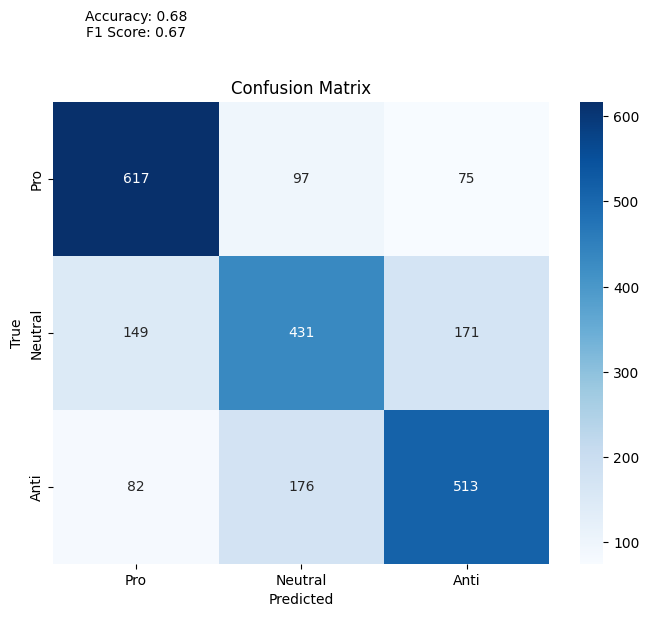

In [245]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

y_pred_arr = np.array(y_pred)
y_test_arr = np.array(y_test)

cm = confusion_matrix(y_test_arr.argmax(axis=1), y_pred_arr.argmax(axis=1))

accuracy = accuracy_score(y_test_arr.argmax(axis=1), y_pred_arr.argmax(axis=1))
f1 = f1_score(y_test_arr.argmax(axis=1), y_pred_arr.argmax(axis=1), average='weighted')

sentiment_labels = ["Pro", "Neutral", "Anti"]
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}', horizontalalignment='center', verticalalignment='center')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Analisis hasil prediksi

dari hasil akurasi tersebut, lebih tinggi dibandingkan parameter sebelumnya yang sebesar 0.6698

save model and tokenizer

In [ ]:
# Save the model with best estimator
from keras.models import save_model
save_path = './gdrive/MyDrive/Siscer/'
save_model(best_estimator.model_, save_path + "lstm_model_sentiment_tweets.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

In [ ]:
import pickle

# Define the desired path to save the tokenizer
tokenizer_save_path = save_path + 'tokenizer_sentiment_tweets.pickle'

# Save the tokenizer
with open(tokenizer_save_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Test dengan teks langsung

In [ ]:
test_texts = [
    "Climate change is hoax created by the Global Elite",
    "We need to do something to slow down the Climate change",
    "I don't know why people did not believe in Climate change?"
    ] # this text should be cleaned prior to get a better results
sequences = tokenizer.texts_to_sequences(test_texts)
max_sequence_length = max_number_of_words
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
pred_sentiment = best_estimator.predict(padded_sequences)

sentiment_labels = ["sentiment_pro", "sentiment_neutral", "sentiment_anti"]
decoded_predictions = [sentiment_labels[i] for i in pred_sentiment.argmax(axis=1)]

# Create a DataFrame with the text and predictions
result_df = pd.DataFrame({
    "text": test_texts,
    "sentiment_pro": [1 if label == "sentiment_pro" else 0 for label in decoded_predictions],
    "sentiment_neutral": [1 if label == "sentiment_neutral" else 0 for label in decoded_predictions],
    "sentiment_anti": [1 if label == "sentiment_anti" else 0 for label in decoded_predictions]
})

display(result_df)

1/1 [==============================] - 0s 268ms/step


,text,sentiment_pro,sentiment_neutral,sentiment_anti
0,Climate change is hoax created by the Global E...,0,0,1
1,We need to do something to slow down the Clima...,0,1,0
2,I don't know why people did not believe in Cli...,0,1,0
